<a href="https://colab.research.google.com/github/aebenm/web-scraping-project/blob/main/WebScaping_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#fetch the webpage content
url = "https://www.worlddata.info/asia/india/inflation-rates.php"
response = requests.get(url)
content = response.content

In [ ]:
#create a beautifulsoup object
soup = BeautifulSoup(content, 'html.parser')

In [ ]:
#extract the table
table = soup.find('table')
#convert html table to pandas dataframe
df = pd.read_html(str(table))


In [ ]:
df[0]

,Year,India,Ø EU,Ø USA,Ø World
0,2021,5.13 %,2.55 %,4.70 %,3.48 %
1,2020,6.62 %,0.48 %,1.23 %,1.92 %
2,2019,3.73 %,1.63 %,1.81 %,2.21 %
3,2018,3.94 %,1.74 %,2.44 %,2.44 %
4,2017,3.33 %,1.43 %,2.13 %,2.19 %
...,...,...,...,...,...
57,1964,13.36 %,3.42 %,1.28 %,NaN
58,1963,2.95 %,2.92 %,1.24 %,NaN
59,1962,3.63 %,3.55 %,1.20 %,NaN
60,1961,1.70 %,2.08 %,1.07 %,NaN


In [ ]:
all_headers = [header.text.replace('Ø ', '') for header in table.find_all('th')]

results = [{all_headers[i]: cell.text for i, cell in enumerate(row.find_all('td'))}
           for row in table.find_all('tr')][1:]
result = [{key: entry[key].replace(" %", "") for key in entry} for entry in results]



In [ ]:
df = pd.DataFrame(result)
df

,Year,India,EU,USA,World
0,2021,5.13,2.55,4.70,3.48
1,2020,6.62,0.48,1.23,1.92
2,2019,3.73,1.63,1.81,2.21
3,2018,3.94,1.74,2.44,2.44
4,2017,3.33,1.43,2.13,2.19
...,...,...,...,...,...
57,1964,13.36,3.42,1.28,n/a
58,1963,2.95,2.92,1.24,n/a
59,1962,3.63,3.55,1.20,n/a
60,1961,1.70,2.08,1.07,n/a


In [ ]:
df['World'] = df['World'].replace("n/a", "0")


In [ ]:
df[['India', 'EU', 'USA', 'World']] = df[['India', 'EU', 'USA', 'World']].apply(pd.to_numeric, errors='coerce')


In [ ]:
in_india = df.groupby('India')['Year'].sum().reset_index()
in_india = in_india.sort_values(by='Year', ascending=False).head(10)

in_india

,India,Year
22,5.13,2021
30,6.62,2020
10,3.73,2019
14,3.94,2018
8,3.33,2017
20,4.95,2016
19,4.91,2015
31,6.67,2014
50,11.06,2013
43,9.31,2012


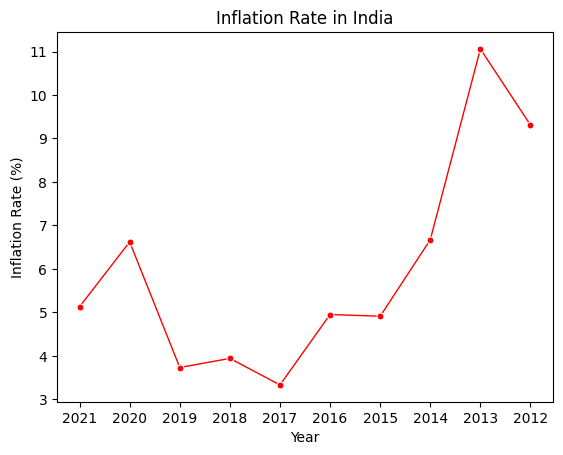

In [ ]:
# Plotting the line graph
sns.lineplot(data=in_india, y='India', x='Year', color='red', linewidth=1, marker='o', markersize=5)

# Setting labels and title
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate in India')

# Displaying the graph
plt.show()

In [ ]:
eu_us = df.groupby('EU').agg({'USA': 'sum', 'Year': 'sum'}).reset_index()
eu_us = eu_us.sort_values(by='Year', ascending=False).head(10)


eu_us

,EU,USA,Year
17,2.55,4.70,2021
3,0.48,1.23,2020
8,1.63,1.81,2019
9,1.74,3.90,20181960
6,1.43,2.13,2017
1,0.18,1.26,2016
0,-0.06,0.12,2015
2,0.20,1.62,2014
5,1.22,1.46,2013
18,2.66,2.07,2012


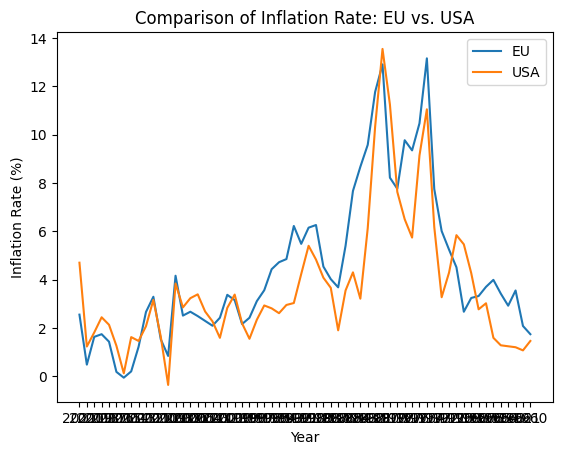

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset with columns 'EU', 'USA', and 'Year'

# Filter the dataset for EU and USA
df_eu_usa = df[['EU', 'USA', 'Year']]

# Plotting the chart
plt.plot(df_eu_usa['Year'], df_eu_usa['EU'], label='EU')
plt.plot(df_eu_usa['Year'], df_eu_usa['USA'], label='USA')

# Setting labels and title
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Comparison of Inflation Rate: EU vs. USA')

# Adding legend
plt.legend()

# Displaying the chart
plt.show()


In [ ]:
in_world = df.groupby('World')['Year'].sum().reset_index()
in_world = in_world.sort_values(by='Year', ascending=False).head(10)

in_world

,World,Year
15,3.48,2021
3,1.92,2020
5,2.21,2019
7,2.44,2018
4,2.19,2017
2,1.55,2016
1,1.43,2015
6,2.35,2014
8,2.62,2013
17,3.73,2012
